In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Comb_heart_data.csv")
df.head()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
df.tail()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
924,54,0,4,127,333,1,1,154,0,0,?,?,?,1
925,62,1,1,?,139,0,1,?,?,?,?,?,?,0
926,55,1,4,122,223,1,1,100,0,0,?,?,6,2
927,58,1,4,?,385,1,2,?,?,?,?,?,?,0
928,62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [4]:
df.shape

(929, 14)

Dimension of the dataset is 929 X 14, i.e. 929 rows and 14 features i.e. columns.

In [5]:
# Check continuous columns
con=df._get_numeric_data().columns
print("No of Continuous columns:",len(df._get_numeric_data().columns),"\n\n",con)

No of Continuous columns: 4 

 Index(['Age', 'Sex', 'ChestPain', 'Target'], dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    int64 
 2   ChestPain        929 non-null    int64 
 3   Rest_bp          929 non-null    object
 4   Cholestrol       929 non-null    object
 5   Fast_bld_sugar   929 non-null    object
 6   Rest_Ecg         929 non-null    object
 7   Max_Rt           929 non-null    object
 8   Ex_Angina        929 non-null    object
 9   St_Depr          929 non-null    object
 10  Slope            929 non-null    object
 11  Colored_Vessels  929 non-null    object
 12  Thalassemia      929 non-null    object
 13  Target           929 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 101.7+ KB


Only 4 columns are shown as contiuous columns, when in actuality all columns must be numeric, so there are certain values which make them categorical. To make sure what the values are in each column we would perform value_counts() function on each column and determine what exactly is making the columns categorical.

### value_counts on each column

In [7]:
col_name=list(df.columns)
col_name 
#These are all the columns in the dataset

['Age',
 'Sex',
 'ChestPain',
 'Rest_bp',
 'Cholestrol',
 'Fast_bld_sugar',
 'Rest_Ecg',
 'Max_Rt',
 'Ex_Angina',
 'St_Depr',
 'Slope',
 'Colored_Vessels',
 'Thalassemia',
 'Target']

In [8]:
for i in col_name:
    print(df[i].value_counts(),"\n")

58    53
57    50
62    44
60    42
54    42
59    41
56    39
63    38
51    38
61    37
55    34
64    32
52    32
53    29
65    26
67    24
44    23
41    23
50    20
43    20
66    19
48    19
42    19
46    18
45    18
69    16
68    14
47    14
49    12
70    11
38    11
35    10
40     9
39     8
71     8
74     8
37     5
34     5
72     4
77     3
76     3
75     3
29     2
36     1
73     1
32     1
Name: Age, dtype: int64 

1    719
0    210
Name: Sex, dtype: int64 

4    517
3    236
2    118
1     58
Name: ChestPain, dtype: int64 

120    103
130     97
140     84
?       58
110     57
150     50
160     41
125     32
128     28
138     26
112     20
115     20
135     19
132     19
124     16
145     16
118     15
122     14
134     14
170     13
100     13
108     12
152     12
142     11
105     11
136     10
126     10
180      9
144      8
155      8
95       6
178      5
146      5
102      5
158      5
104      4
94       4
200      4
148      4
154      4
165     

After looking at the Value counts of each column we can see that there are ? in places where there are no values. So replace these ? special character with NaN's.

In [9]:
df.isna().sum()

Age                0
Sex                0
ChestPain          0
Rest_bp            0
Cholestrol         0
Fast_bld_sugar     0
Rest_Ecg           0
Max_Rt             0
Ex_Angina          0
St_Depr            0
Slope              0
Colored_Vessels    0
Thalassemia        0
Target             0
dtype: int64

In [10]:
df=df.replace("?",np.NaN)

In [11]:
df.isna().sum()

Age                  0
Sex                  0
ChestPain            0
Rest_bp             58
Cholestrol           7
Fast_bld_sugar      82
Rest_Ecg             1
Max_Rt              54
Ex_Angina           54
St_Depr             62
Slope              119
Colored_Vessels    324
Thalassemia        222
Target               0
dtype: int64

In [12]:
df.describe(include="all") #All features included, categorical and continuous 

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
count,929.000000,929.000000,929.000000,871,922,847,928,875,875,867,810,605,707,929.00000
unique,NaN,NaN,NaN,58,180,2,3,117,2,52,3,4,3,NaN
top,NaN,NaN,NaN,120,0,0,0,120,0,0,2,0,3,NaN
freq,NaN,NaN,NaN,103,172,684,467,27,528,280,394,354,355,NaN
mean,55.612487,0.773950,3.304629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.17761
std,8.994760,0.418497,0.917261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24555
min,29.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,50.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
50%,57.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000
75%,62.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000


In [13]:
df.describe() # Only continuous values
# In this case it would be same as above since there are only continuous columns

,Age,Sex,ChestPain,Target
count,929.000000,929.000000,929.000000,929.00000
mean,55.612487,0.773950,3.304629,1.17761
std,8.994760,0.418497,0.917261,1.24555
min,29.000000,0.000000,1.000000,0.00000
25%,50.000000,1.000000,3.000000,0.00000
50%,57.000000,1.000000,4.000000,1.00000
75%,62.000000,1.000000,4.000000,2.00000
max,77.000000,1.000000,4.000000,4.00000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    int64 
 2   ChestPain        929 non-null    int64 
 3   Rest_bp          871 non-null    object
 4   Cholestrol       922 non-null    object
 5   Fast_bld_sugar   847 non-null    object
 6   Rest_Ecg         928 non-null    object
 7   Max_Rt           875 non-null    object
 8   Ex_Angina        875 non-null    object
 9   St_Depr          867 non-null    object
 10  Slope            810 non-null    object
 11  Colored_Vessels  605 non-null    object
 12  Thalassemia      707 non-null    object
 13  Target           929 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 101.7+ KB


## Visualizing and Filling Missing Values

In [15]:
import missingno as msn

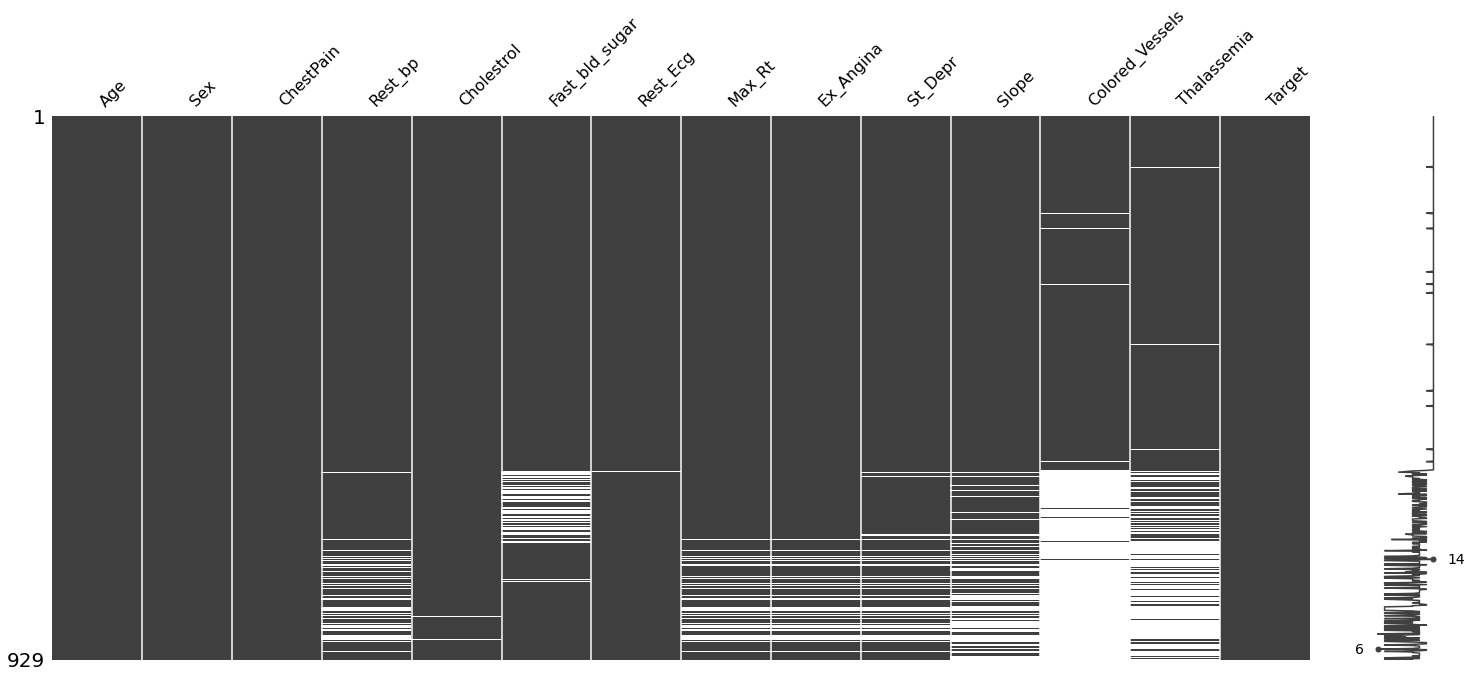

In [16]:
msn.matrix(df)

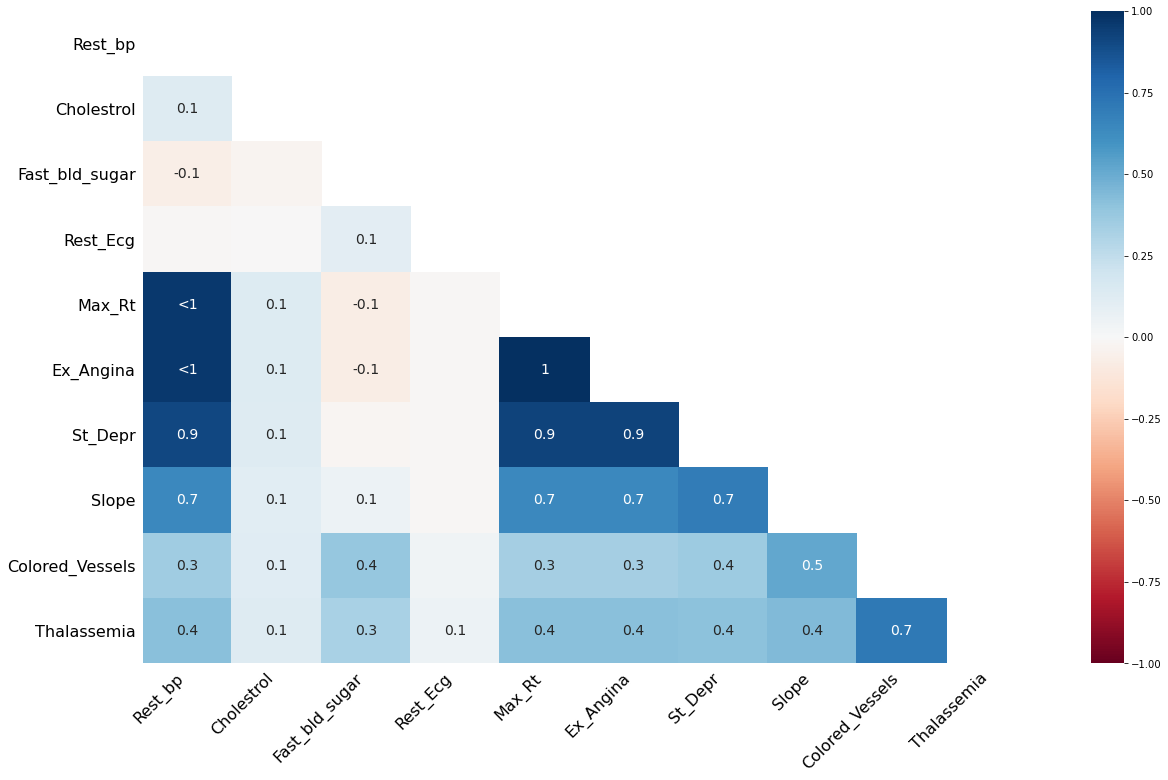

In [17]:
msn.heatmap(df)
#missingno.heatmap visualizes the correlation matrix about the locations of missing values in columns.

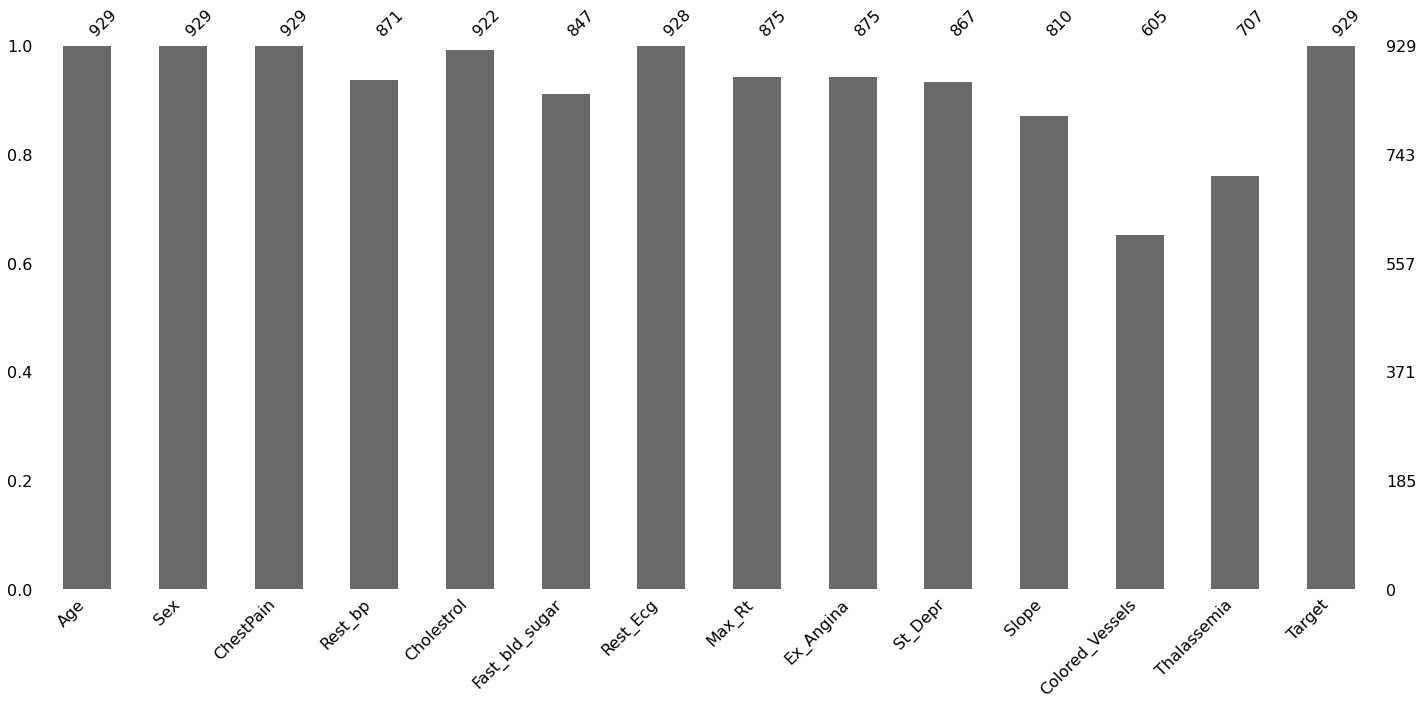

In [18]:
msn.bar(df)

The Nan's have to be filled, for filling the NaN valujes there are many methods to do so, but I am going to use mean (interpolate) and mode to fill the NaN values.

After looking at the values of columns having NaN values, I have decided for the columns who have wide range of values I would use interpolate mean method to fill the NaN's and for columns who have very few range of values like here for the Fast blood sugar column we have 2 values 0 i.e. no high blood sugar and 1 i.e. has higher than normal range blood sugar, for such columns I would use the mode method to fill the NaN values.

In [19]:
mode_col=['Fast_bld_sugar','Rest_Ecg','Ex_Angina','Slope','Colored_Vessels','Thalassemia']
for col in mode_col:
    df[col].fillna(df[col].mode()[0],inplace=True)
    
df.isna().sum()

Age                 0
Sex                 0
ChestPain           0
Rest_bp            58
Cholestrol          7
Fast_bld_sugar      0
Rest_Ecg            0
Max_Rt             54
Ex_Angina           0
St_Depr            62
Slope               0
Colored_Vessels     0
Thalassemia         0
Target              0
dtype: int64

The above cell is for thode columns which are to be filled by mode. Now for the rest of the columns I will use the interpolate mean method to fill the NaN values.

In [20]:
df.fillna(df.mean()[0],inplace=True)

In [21]:
df.isna().sum()

Age                0
Sex                0
ChestPain          0
Rest_bp            0
Cholestrol         0
Fast_bld_sugar     0
Rest_Ecg           0
Max_Rt             0
Ex_Angina          0
St_Depr            0
Slope              0
Colored_Vessels    0
Thalassemia        0
Target             0
dtype: int64

In [22]:
column_list = df.columns
for i in column_list:
    print("Values of",i,"column\n",df[i].unique())
    print("--------------\n")

Values of Age column
 [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 32 36 72 73 75]
--------------

Values of Sex column
 [1 0]
--------------

Values of ChestPain column
 [1 4 3 2]
--------------

Values of Rest_bp column
 ['145' '160' '120' '130' '140' '172' '150' '110' '132' '117' '135' '112'
 '105' '124' '125' '142' '128' '170' '155' '104' '180' '138' '108' '134'
 '122' '115' '118' '100' '200' '94' '165' '102' '152' '101' '126' '174'
 '148' '178' '158' '192' '129' '144' '123' '136' '146' '106' '156' '154'
 '114' '164' '95' 55.61248654467169 '80' '185' '116' '0' '96' '190' '127']
--------------

Values of Cholestrol column
 ['233' '286' '229' '250' '204' '236' '268' '354' '254' '203' '192' '294'
 '256' '263' '199' '168' '239' '275' '266' '211' '283' '284' '224' '206'
 '219' '340' '226' '247' '167' '230' '335' '234' '177' '276' '353' '243'
 '225' '302' '212' '330' '175' '417' '197' '198' '290' '253' '172' 

Change the values of the object i.e. the categorical columns.

The values will be assigned as given in the UCI site for each column.

In [23]:
df['Sex'][df['Sex'] == 0] = 'female'
df['Sex'][df['Sex'] == 1] = 'male'

df['ChestPain'][df['ChestPain'] == 1] = 'typical angina'
df['ChestPain'][df['ChestPain'] == 2] = 'atypical angina'
df['ChestPain'][df['ChestPain'] == 3] = 'non-anginal pain'
df['ChestPain'][df['ChestPain'] == 4] = 'asymptomatic'

df['Fast_bld_sugar'][df['Fast_bld_sugar'] == '0'] = 'lower than 120mg/ml'
df['Fast_bld_sugar'][df['Fast_bld_sugar'] == '1'] = 'greater than 120mg/ml'

df['Rest_Ecg'][df['Rest_Ecg'] == '0'] = 'normal'
df['Rest_Ecg'][df['Rest_Ecg'] == '1'] = 'ST-T wave abnormality'
df['Rest_Ecg'][df['Rest_Ecg'] == '2'] = 'left ventricular hypertrophy'

df['Ex_Angina'][df['Ex_Angina'] == '0'] = 'no'
df['Ex_Angina'][df['Ex_Angina'] == '1'] = 'yes'

df['Slope'][df['Slope'] == '1'] = 'upsloping'
df['Slope'][df['Slope'] == '2'] = 'flat'
df['Slope'][df['Slope'] == '3'] = 'downsloping'

# Values of Colored_Vessels column
#  ['0' '3' '2' '1']
# ca: number of major vessels (0-3) colored by flourosopy

df['Thalassemia'][df['Thalassemia'] == '3'] = 'normal'
df['Thalassemia'][df['Thalassemia'] == '6'] = 'fixed defect'
df['Thalassemia'][df['Thalassemia'] == '7'] = 'reversable defect'

df['Target'][df['Target'] == 2] = 1
df['Target'][df['Target'] == 3] = 1
df['Target'][df['Target'] == 4] = 1

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    object
 2   ChestPain        929 non-null    object
 3   Rest_bp          929 non-null    object
 4   Cholestrol       929 non-null    object
 5   Fast_bld_sugar   929 non-null    object
 6   Rest_Ecg         929 non-null    object
 7   Max_Rt           929 non-null    object
 8   Ex_Angina        929 non-null    object
 9   St_Depr          929 non-null    object
 10  Slope            929 non-null    object
 11  Colored_Vessels  929 non-null    object
 12  Thalassemia      929 non-null    object
 13  Target           929 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 101.7+ KB


In [25]:
df.head()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,male,typical angina,145,233,greater than 120mg/ml,left ventricular hypertrophy,150,no,2.3,downsloping,0,fixed defect,0
1,67,male,asymptomatic,160,286,lower than 120mg/ml,left ventricular hypertrophy,108,yes,1.5,flat,3,normal,1
2,67,male,asymptomatic,120,229,lower than 120mg/ml,left ventricular hypertrophy,129,yes,2.6,flat,2,reversable defect,1
3,37,male,non-anginal pain,130,250,lower than 120mg/ml,normal,187,no,3.5,downsloping,0,normal,0
4,41,female,atypical angina,130,204,lower than 120mg/ml,left ventricular hypertrophy,172,no,1.4,upsloping,0,normal,0


In [26]:
df=df.replace(-0.9,df.mean())
# In the UCI data repository it is mentioned that missing 
# values are distinguised with -0.9, so we replace this 
# value also with the mean value.

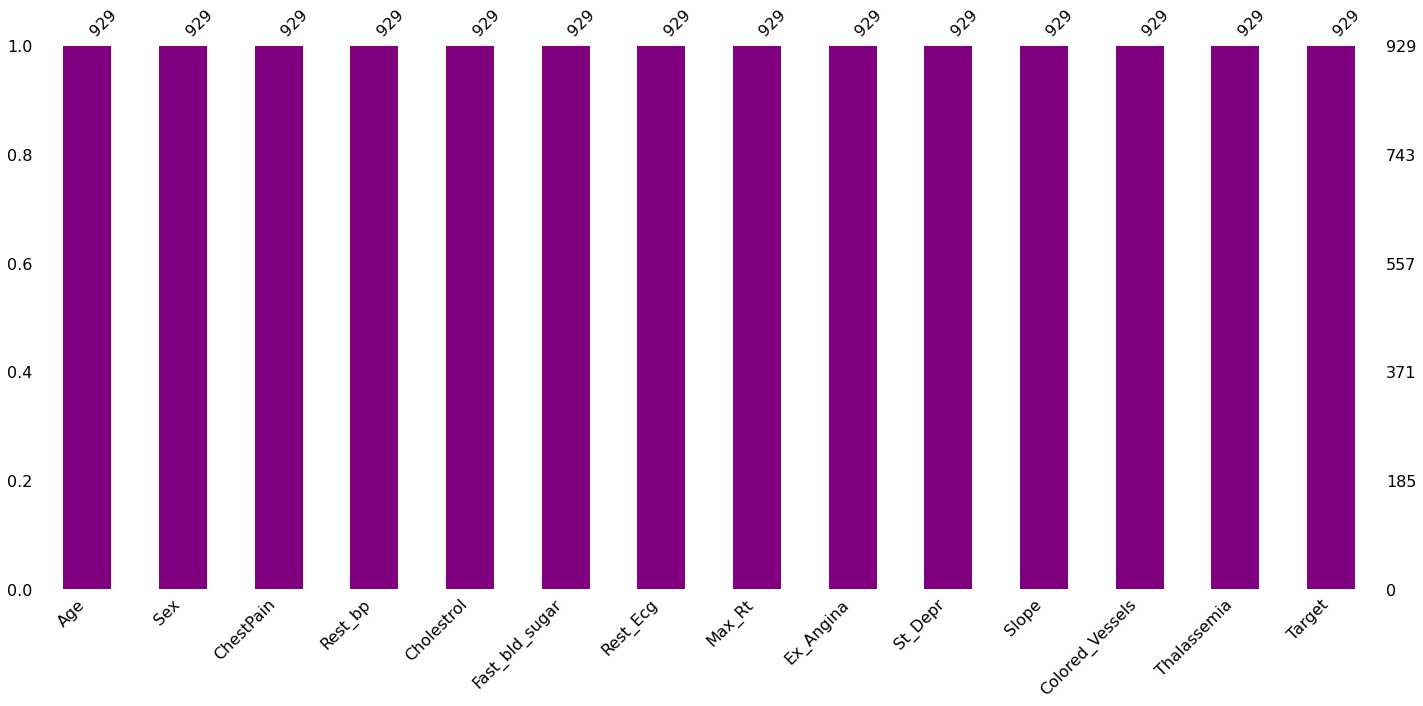

In [27]:
#Lets check for missing values once again
msn.bar(df,color='Purple')

There are no missing values, now visualization of the data.

## Visualization

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

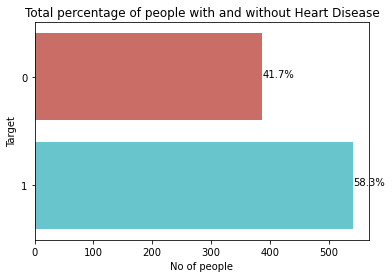

In [29]:
total = len(df['Target'])
ax = sns.countplot(y="Target", data=df, palette="hls")
ax.set_title('Total percentage of people with and without Heart Disease')
plt.xlabel('No of people')

total = len(df['Target'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Percentage of people with heart disease is 58.3% 

Percentage of people without heart disease is 41.7%

In [30]:
df.sample(4)

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
29,40,male,asymptomatic,110,167,lower than 120mg/ml,left ventricular hypertrophy,114,yes,2,flat,0,reversable defect,1
817,62,male,asymptomatic,158,210,greater than 120mg/ml,normal,112,yes,3,downsloping,0,normal,1
485,42,male,typical angina,148,244,lower than 120mg/ml,left ventricular hypertrophy,178,no,0.8,upsloping,2,normal,0
862,68,male,typical angina,55.6125,181,greater than 120mg/ml,ST-T wave abnormality,55.6125,no,55.6125,flat,0,normal,0


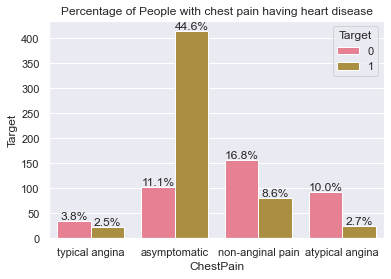

In [31]:
total = len(df['Target'])
sns.set(style="darkgrid",palette="husl")
ax = sns.countplot(x="ChestPain", hue="Target", data=df) 
ax.set_title("Percentage of People with chest pain having heart disease")
ax.set(xlabel="ChestPain",ylabel="Target")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center") 

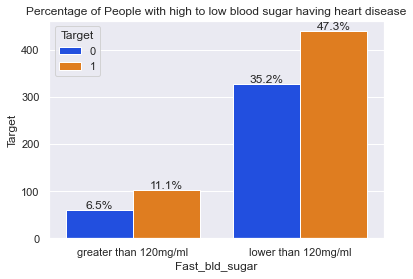

In [32]:
total = len(df['Target'])
sns.set(style="darkgrid",palette="bright")
ax = sns.countplot(x="Fast_bld_sugar", hue="Target", data=df) 
ax.set_title("Percentage of People with high to low blood sugar having heart disease")
ax.set(xlabel="Fast_bld_sugar",ylabel="Target")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center") 

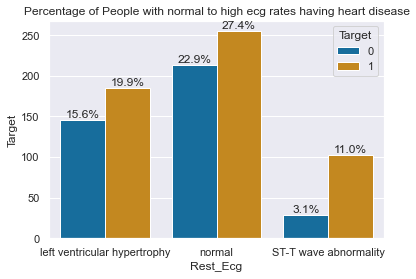

In [33]:
total = len(df['Target'])
sns.set(style="darkgrid",palette="colorblind")
ax = sns.countplot(x="Rest_Ecg", hue="Target", data=df) 
ax.set_title("Percentage of People with normal to high ecg rates having heart disease")
ax.set(xlabel="Rest_Ecg",ylabel="Target")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center") 

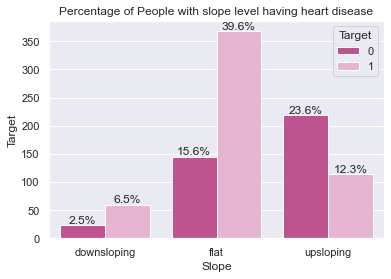

In [34]:
total = len(df['Target'])
sns.set(style="darkgrid",palette="PiYG")
ax = sns.countplot(x="Slope", hue="Target", data=df) 
ax.set_title("Percentage of People with slope level having heart disease")
ax.set(xlabel="Slope",ylabel="Target")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center") 

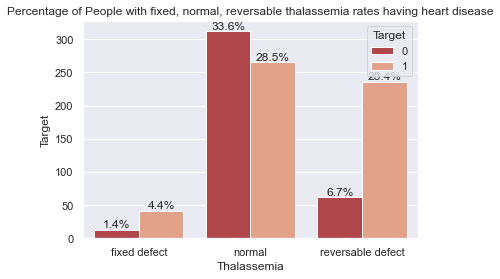

In [35]:
total = len(df['Target'])
sns.set(style="darkgrid",palette="RdGy")
ax = sns.countplot(x="Thalassemia", hue="Target", data=df) 
ax.set_title("Percentage of People with fixed, normal, reversable thalassemia rates having heart disease")
ax.set(xlabel="Thalassemia",ylabel="Target")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center") 

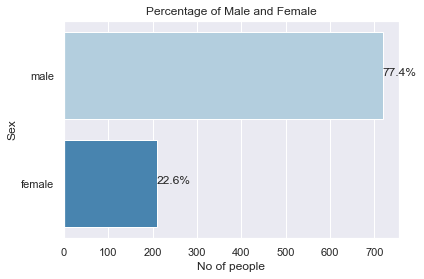

In [36]:
total = len(df['Sex'])
ax = sns.countplot(y="Sex", data=df, palette="Blues")
ax.set_title('Percentage of Male and Female')
plt.xlabel('No of people')

total = len(df['Sex'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Percentage of Female Patients: 22.6%

Percentage of Male Patients: 77.4%

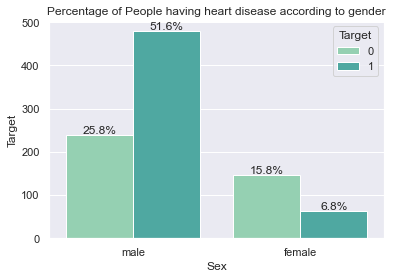

In [37]:
total = len(df['Target'])
sns.set(style="darkgrid",palette="mako_r")
ax = sns.countplot(x="Sex", hue="Target", data=df) 
ax.set_title("Percentage of People having heart disease according to gender")
ax.set(xlabel="Sex",ylabel="Target")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center") 

In [38]:
df.sample(1)

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
789,51,male,asymptomatic,55.6125,218,greater than 120mg/ml,left ventricular hypertrophy,55.6125,no,55.6125,flat,0,normal,0


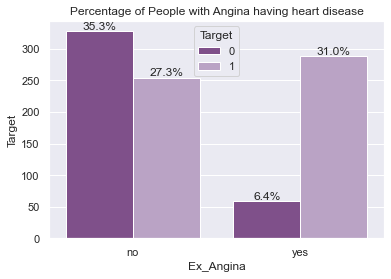

In [39]:
total = len(df['Target'])
sns.set(style="darkgrid",palette="PRGn")
ax = sns.countplot(x="Ex_Angina", hue="Target", data=df) 
ax.set_title("Percentage of People with Angina having heart disease")
ax.set(xlabel="Ex_Angina",ylabel="Target")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center") 

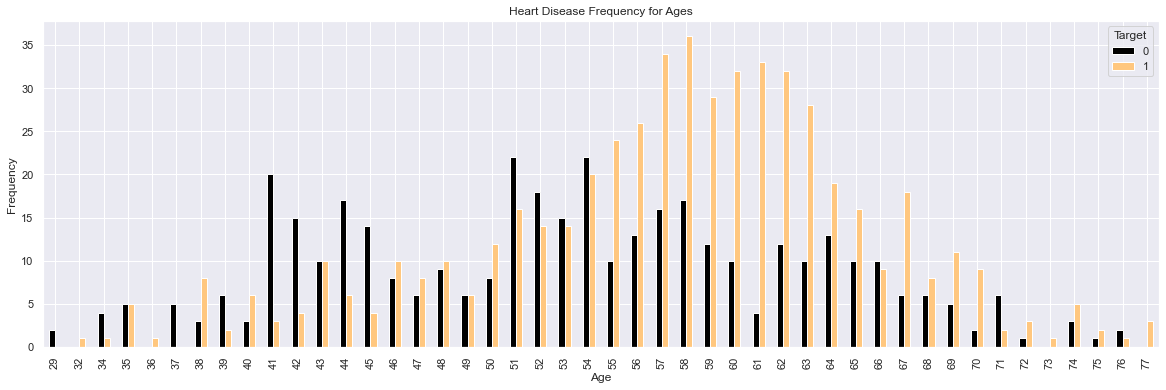

In [40]:
pd.crosstab(df.Age,df.Target).plot(kind="bar",figsize=(20,6),cmap='copper')
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

### Univariant Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    object
 2   ChestPain        929 non-null    object
 3   Rest_bp          929 non-null    object
 4   Cholestrol       929 non-null    object
 5   Fast_bld_sugar   929 non-null    object
 6   Rest_Ecg         929 non-null    object
 7   Max_Rt           929 non-null    object
 8   Ex_Angina        929 non-null    object
 9   St_Depr          929 non-null    object
 10  Slope            929 non-null    object
 11  Colored_Vessels  929 non-null    object
 12  Thalassemia      929 non-null    object
 13  Target           929 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 101.7+ KB


In [42]:
df.sample(1)

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
465,54,female,non-anginal pain,110,214,lower than 120mg/ml,normal,158,no,1.6,flat,0,normal,0


In [43]:
df['Rest_bp']=df['Rest_bp'].astype(int)
df['Cholestrol']=df['Cholestrol'].astype(int)
df['St_Depr']=df['St_Depr'].astype(float)
df['Max_Rt']=df['Max_Rt'].astype(int)

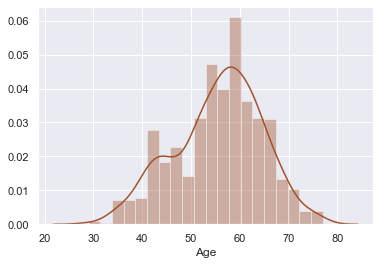

In [44]:
sns.distplot(df['Age'],color="sienna")

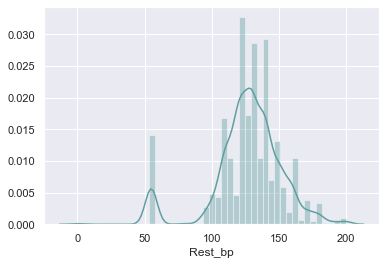

In [45]:
sns.distplot(df['Rest_bp'],color="cadetblue")

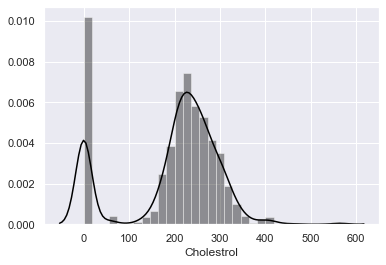

In [46]:
sns.distplot(df['Cholestrol'],color="black")

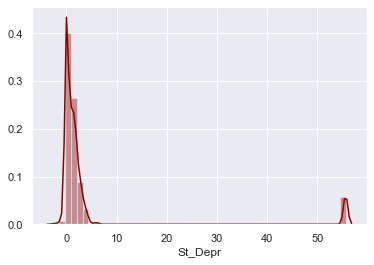

In [47]:
sns.distplot(df['St_Depr'],color="darkred")

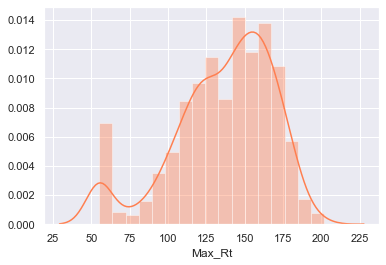

In [48]:
sns.distplot(df['Max_Rt'],color="coral")

In [49]:
df.sample(1)

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
286,58,female,asymptomatic,170,225,greater than 120mg/ml,left ventricular hypertrophy,146,yes,2.8,flat,2,fixed defect,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              929 non-null    int64  
 1   Sex              929 non-null    object 
 2   ChestPain        929 non-null    object 
 3   Rest_bp          929 non-null    int32  
 4   Cholestrol       929 non-null    int32  
 5   Fast_bld_sugar   929 non-null    object 
 6   Rest_Ecg         929 non-null    object 
 7   Max_Rt           929 non-null    int32  
 8   Ex_Angina        929 non-null    object 
 9   St_Depr          929 non-null    float64
 10  Slope            929 non-null    object 
 11  Colored_Vessels  929 non-null    object 
 12  Thalassemia      929 non-null    object 
 13  Target           929 non-null    int64  
dtypes: float64(1), int32(3), int64(2), object(8)
memory usage: 90.8+ KB


In [51]:
df = pd.concat([df, pd.get_dummies(df['Sex'])], axis=1)
df.drop('Sex',axis=1,inplace=True)
df = pd.concat([df, pd.get_dummies(df['ChestPain'])], axis=1)
df.drop('ChestPain',axis=1,inplace=True)
df = pd.concat([df, pd.get_dummies(df['Fast_bld_sugar'])], axis=1)
df.drop('Fast_bld_sugar',axis=1,inplace=True)
df = pd.concat([df, pd.get_dummies(df['Rest_Ecg'])], axis=1)
df.drop('Rest_Ecg',axis=1,inplace=True)
df = pd.concat([df, pd.get_dummies(df['Ex_Angina'])], axis=1)
df.drop('Ex_Angina',axis=1,inplace=True)
df = pd.concat([df, pd.get_dummies(df['Slope'])], axis=1)
df.drop('Slope',axis=1,inplace=True)
df = pd.concat([df, pd.get_dummies(df['Thalassemia'])], axis=1)
df.drop('Thalassemia',axis=1,inplace=True)
df = pd.concat([df, pd.get_dummies(df['Colored_Vessels'])], axis=1)
df.drop('Colored_Vessels',axis=1,inplace=True)
df.columns
df.shape

(929, 29)

In [52]:
df.sample(3)

,Age,Rest_bp,Cholestrol,Max_Rt,St_Depr,Target,female,male,asymptomatic,atypical angina,...,downsloping,flat,upsloping,fixed defect,normal,reversable defect,0,1,2,3
875,59,140,274,154,2.0,0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
499,69,160,234,131,0.1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
785,53,154,0,140,1.5,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0


In [53]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


# Without using smote

In [54]:
X = df.drop('Target',axis=1)
Y = df['Target']

In [55]:
# splitting data in train and test
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.30, random_state = 10)

In [56]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_valid=sc.transform(X_valid)

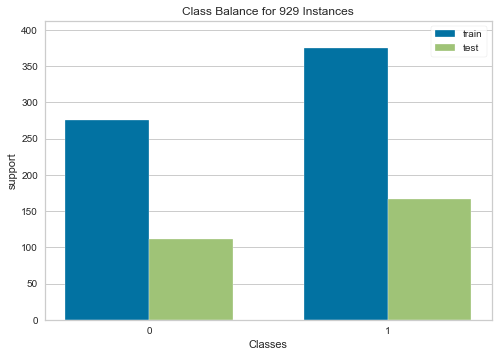

In [57]:
# visualizing the results

from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1])

visualizer.fit(y_train,y_valid)
visualizer.ax.set_xlabel("Classes")
visualizer.ax.set_ylabel("Amount of Occurrences of Class")
visualizer.show()

### SVM

In [58]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC

In [59]:
svm_classifier= SVC(probability=True, kernel='rbf')
svm_classifier.fit(X_train,y_train)

SVC(probability=True)

In [60]:
# Predict
y_pred_svm= svm_classifier.predict(X_valid)

#Classification Report
print(classification_report(y_valid,y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       112
           1       0.86      0.93      0.89       167

    accuracy                           0.87       279
   macro avg       0.87      0.85      0.86       279
weighted avg       0.87      0.87      0.87       279



Text(52.0, 0.5, 'predicted label')

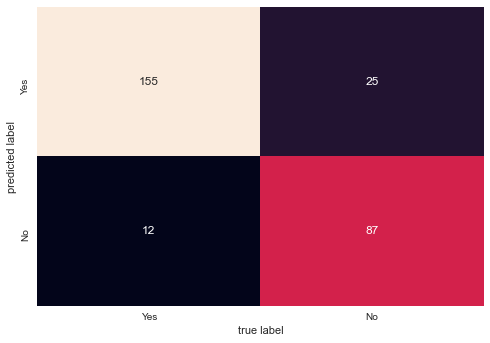

In [61]:
mat_svm = confusion_matrix(y_valid, y_pred_svm, labels = [1,0])
sns.heatmap(mat_svm.T,  annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [62]:
print(mat_svm)

[[155  12]
 [ 25  87]]


In [63]:
TP=mat_svm[0,0]
FN=mat_svm[0,1]
FP=mat_svm[1,0]
TN=mat_svm[1,1]
Recall=TP/(TP+FN)
print("Recall: ",Recall)
Precision=TP/(TP+FP)
print("Precision: ",Precision)
FM=(2*Recall*Precision)/(Recall+Precision)
print("F-Measure: ",FM)

Recall:  0.9281437125748503
Precision:  0.8611111111111112
F-Measure:  0.8933717579250722


### The receiver operating characteristic (ROC) - SVM

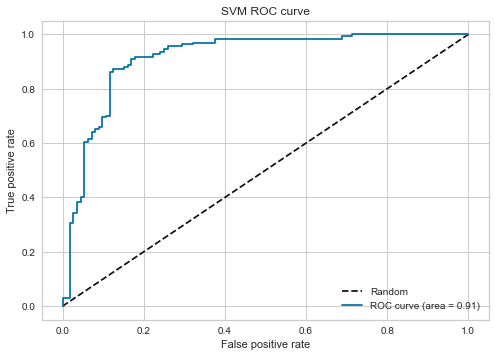

In [64]:
y_pred_svm_proba=svm_classifier.predict_proba(X_valid)[:,1]
fpr_svm, tpr_svm, _svm = roc_curve(y_valid, y_pred_svm_proba)
roc_auc=auc(fpr_svm,tpr_svm)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')

plt.plot(fpr_svm,tpr_svm,label='ROC curve (area = %0.2f)' %roc_auc)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('SVM ROC curve')
plt.legend(loc='best')

In [65]:
svm_classifier.score(X_valid,y_valid)

0.8673835125448028

In [66]:
svm_classifier.score(X_train,y_train)

0.9092307692307692

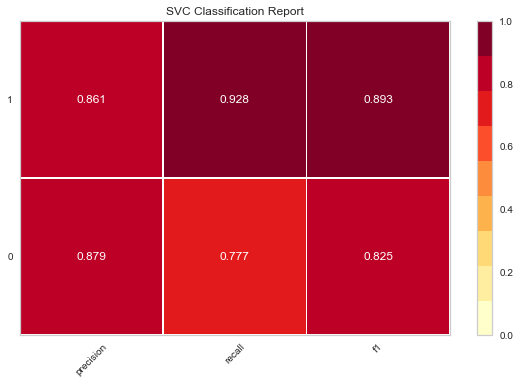

In [67]:
from yellowbrick.classifier import ClassificationReport
svccr = ClassificationReport(SVC(probability=True))
svccr.fit(X_train, y_train)
svccr.score(X_valid, y_valid)
svccr.show()

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

# initiating the classifier and training the model

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [69]:
# Predicting the test set results and calculating the accuracy

y_pred_logit = classifier.predict(X_valid)
classifier.score(X_valid, y_valid)

0.7992831541218638

In [70]:
classifier.score(X_train, y_train)

0.8369230769230769

In [71]:
# confusion matrix

from sklearn.metrics import confusion_matrix

matrix_logit = confusion_matrix(y_valid, y_pred_logit)
print(matrix_logit)

[[ 81  31]
 [ 25 142]]


In [72]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_logit))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       112
           1       0.82      0.85      0.84       167

    accuracy                           0.80       279
   macro avg       0.79      0.79      0.79       279
weighted avg       0.80      0.80      0.80       279



Text(52.0, 0.5, 'predicted label')

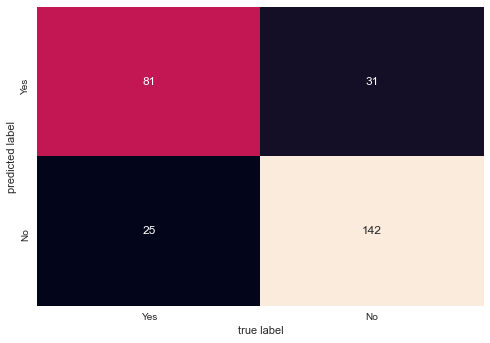

In [73]:
sns.heatmap(matrix_logit,  annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [74]:
# Compute precision, recall, F-measure and support

TP=matrix_logit[0,0]
FN=matrix_logit[0,1]
FP=matrix_logit[1,0]
TN=matrix_logit[1,1]

Precision=TP/(TP+FP)
print("Precision: ",Precision)

Recall=TP/(TP+FN)
print("Recall: ",Recall)

FM=(2*Recall*Precision)/(Recall+Precision)
print("F-Measure: ",FM)

Precision:  0.7641509433962265
Recall:  0.7232142857142857
F-Measure:  0.7431192660550459


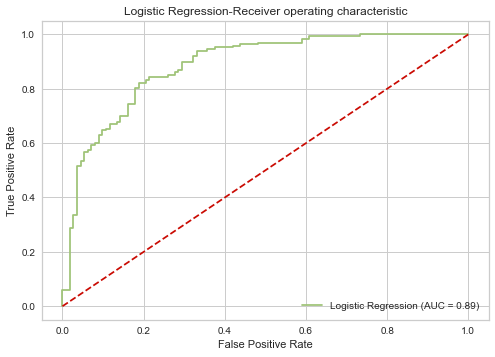

The AUC: 0.8860136869118904


In [75]:
logit_roc_auc=classifier.predict_proba(X_valid)[:,1]
fpr,tpr,threshold=roc_curve(y_valid,logit_roc_auc)
roc_auc=auc(fpr,tpr)
plt.figure()

# ROC
plt.plot(fpr,tpr,'g',label='Logistic Regression (AUC = %0.2f)'% roc_auc)

# random FPR and TPR
plt.plot([0,1],[0,1],'r--')

# title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression-Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

print('The AUC:', auc(fpr,tpr))

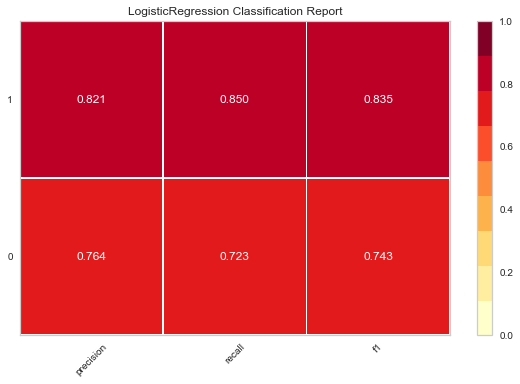

In [76]:
from yellowbrick.classifier import ClassificationReport
lrcr = ClassificationReport(LogisticRegression(max_iter=1000))
lrcr.fit(X_train, y_train)
lrcr.score(X_valid, y_valid)
lrcr.show()

# K-Nearest Neighbours (KNN)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [78]:
from sklearn import metrics
y_pred_knn = classifier.predict(X_valid)

In [79]:
classifier.score(X_valid, y_valid)

0.8207885304659498

In [80]:
classifier.score(X_train, y_train)

0.8507692307692307

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
mat_knn=confusion_matrix(y_valid, y_pred_knn)
print(mat_knn)

[[ 82  30]
 [ 20 147]]


In [82]:
print(classification_report(y_valid, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       112
           1       0.83      0.88      0.85       167

    accuracy                           0.82       279
   macro avg       0.82      0.81      0.81       279
weighted avg       0.82      0.82      0.82       279



Text(52.0, 0.5, 'predicted label')

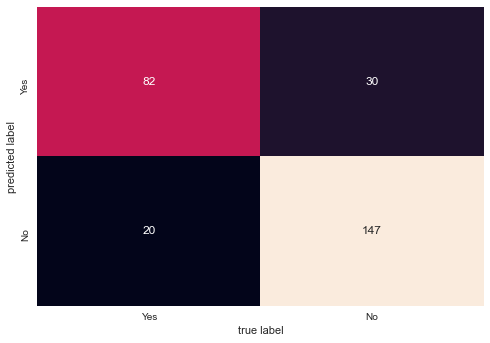

In [83]:
sns.heatmap(mat_knn,  annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [84]:
TP=mat_knn[0,0]
FN=mat_knn[0,1]
FP=mat_knn[1,0]
TN=mat_knn[1,1]

knn_precision=TP/(TP+FP)
print("KNN Precision: ",knn_precision)

knn_recall=TP/(TP+FN)
print("KNN Recall: ",knn_recall)

knn_FM=(2*knn_recall*knn_precision)/(knn_recall+knn_precision)
print("KNN F-Measure: ",knn_FM)

KNN Precision:  0.803921568627451
KNN Recall:  0.7321428571428571
KNN F-Measure:  0.766355140186916


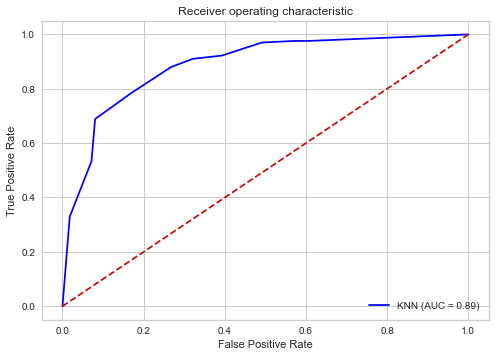

The AUC (smote): 0.8865215996578273


In [85]:
##computing fpr and tpr we plot tpr vs fpr

knn_roc_auc=classifier.predict_proba(X_valid)[:,1]
fpr,tpr,threshold_smote=roc_curve(y_valid,knn_roc_auc)
roc_auc=auc(fpr,tpr)
plt.figure()

# ROC
plt.plot(fpr,tpr,'blue',label='KNN (AUC = %0.2f)'% roc_auc)

# random FPR and TPR
plt.plot([0,1],[0,1],'r--')

# title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

print('The AUC (smote):',auc(fpr,tpr))

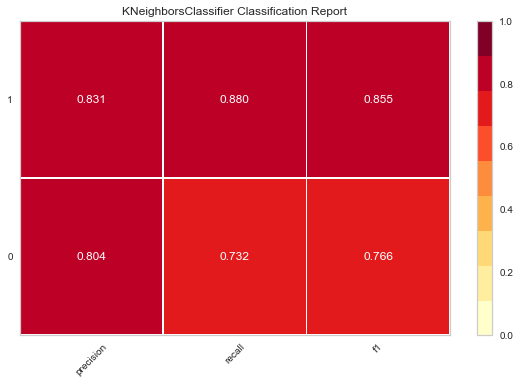

In [86]:
from yellowbrick.classifier import ClassificationReport
knncr = ClassificationReport(KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2))
knncr.fit(X_train, y_train)
knncr.score(X_valid, y_valid)
knncr.show()

The above models SVM, Logistic and KNN have been observed and from the metrics used for classification i.e. the confusion matrix, accuracy score, precision, recall, f-measure and the roc-auc curve we can conclude that SVM works better than the other two models.

# Using SMOTE

### Random Forest

In [87]:
df1=df.drop(['Target'],axis=1)
array = df1.values 
arrayt=df['Target'].values
X = array
Y = arrayt

In [88]:
# splitting data in train and test
seed=600
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.30, random_state = seed)

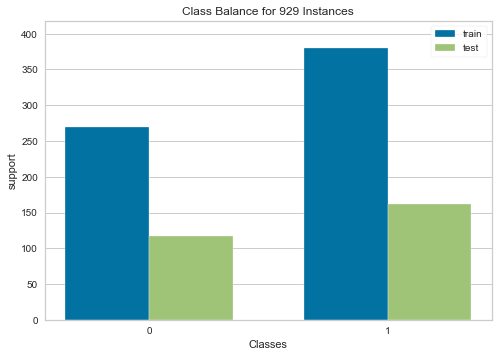

In [89]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1])

visualizer.fit(y_train,y_valid)
visualizer.ax.set_xlabel("Classes")
visualizer.ax.set_ylabel("Amount of Occurrences of Class")
visualizer.show()

## Synthetic Minority Oversampling Technique

### [SMOTE]

In [90]:
from numpy import set_printoptions
from sklearn.metrics import confusion_matrix, classification_report
smt = SMOTE(random_state=seed)
X_train_SMOTE, Y_train_SMOTE = smt.fit_sample(X_train, y_train.ravel()) 
print(X_train_SMOTE.shape)
print(Y_train_SMOTE.shape)
set_printoptions(precision=3)
print('\n Oversampled input: \n %s' % X_train_SMOTE[0:5,:])
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_SMOTE == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_SMOTE == 0)))

(760, 28)
(760,)

 Oversampled input: 
 [[ 54.    132.    288.    159.      0.      1.      0.      0.      1.
    0.      0.      1.      0.      0.      1.      0.      0.      1.
    0.      0.      1.      0.      1.      0.      0.      1.      0.
    0.   ]
 [ 65.    135.    254.    127.      2.8     0.      1.      1.      0.
    0.      0.      0.      1.      0.      1.      0.      1.      0.
    0.      1.      0.      0.      0.      1.      0.      1.      0.
    0.   ]
 [ 60.    102.    318.    160.      0.      1.      0.      0.      0.
    1.      0.      0.      1.      0.      0.      1.      1.      0.
    0.      0.      1.      0.      1.      0.      0.      1.      0.
    0.   ]
 [ 55.    140.    217.    111.      5.6     0.      1.      1.      0.
    0.      0.      0.      1.      0.      0.      1.      0.      1.
    1.      0.      0.      0.      0.      1.      1.      0.      0.
    0.   ]
 [ 54.     55.      0.     55.     55.612   0.      1.      1.  

In [91]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': [2, 3, 4, 5],
    'n_estimators': [200, 300, 400, 500]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2)
grid_result= grid_search.fit(X_train_SMOTE, Y_train_SMOTE)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    7.6s finished


Best: 0.898696 using {'max_features': 3, 'n_estimators': 300}


In [92]:
# Applying Pipeline to random forest for 300 trees
from sklearn.pipeline import Pipeline 
num_trees=300
max_features=4
estimator=[]                                           
estimator.append(('standardize',StandardScaler()))
estimator.append(('RF',RandomForestClassifier(
    n_estimators=num_trees,max_features=max_features))) 
model=Pipeline(estimator)      
kfold=KFold(n_splits=10,random_state=seed)                 

In [93]:
result1=cross_val_score(model,X_train_SMOTE,Y_train_SMOTE,cv=kfold)  
print(result1.mean()*100.0) 

90.65789473684211


In [94]:
smt1 = SMOTE(random_state=seed)
X_train_SMOT1, Y_train_SMOT1 = smt1.fit_sample(X_train, y_train) 
estimator1=[]                                           
estimator1.append(('standardize',StandardScaler()))
estimator1.append(('RF',RandomForestClassifier(
    n_estimators=num_trees,max_features=max_features))) 
model1=Pipeline(estimator1) 

In [95]:
model1.fit(X_train_SMOT1, Y_train_SMOT1)
result = model1.score(X_valid, y_valid)
print((result)*100.0)
predictions = model1.predict(X_valid)
# print classification report 
print(classification_report(y_valid, predictions))

88.88888888888889
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       117
           1       0.87      0.96      0.91       162

    accuracy                           0.89       279
   macro avg       0.90      0.88      0.88       279
weighted avg       0.89      0.89      0.89       279



In [96]:
from sklearn.metrics import classification_report, confusion_matrix
classifier = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_valid)
mat_rf=confusion_matrix(y_valid, y_pred_rf)
print(mat_rf)

[[ 90  27]
 [  8 154]]


In [101]:
# Compute precision, recall, F-measure and support

TP=mat_rf[0,0]
FN=mat_rf[0,1]
FP=mat_rf[1,0]
TN=mat_rf[1,1]

Precision=TP/(TP+FP)
print("Precision: ",Precision)

Recall=TP/(TP+FN)
print("Recall: ",Recall)

FM=(2*Recall*Precision)/(Recall+Precision)
print("F-Measure: ",FM)

Precision:  0.9183673469387755
Recall:  0.7692307692307693
F-Measure:  0.8372093023255814


Text(52.0, 0.5, 'predicted label')

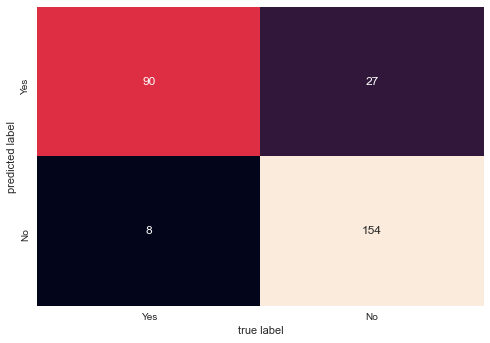

In [97]:
sns.heatmap(mat_rf,  annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

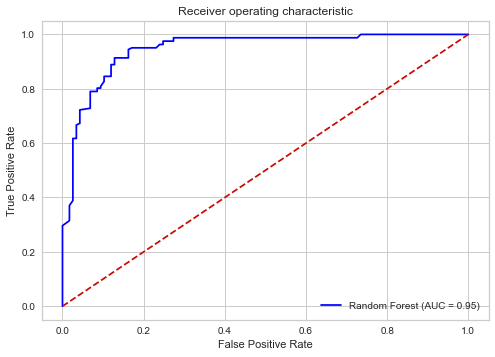

The AUC (smote): 0.9459480848369737


In [98]:

rf_roc_auc_smote=classifier.predict_proba(X_valid)[:,1]
fpr,tpr,threshold_smote=roc_curve(y_valid,rf_roc_auc_smote)
roc_auc_smote=auc(fpr,tpr)
plt.figure()

# ROC
plt.plot(fpr,tpr,'blue',label='Random Forest (AUC = %0.2f)'% roc_auc_smote)

# random FPR and TPR
plt.plot([0,1],[0,1],'r--')

# title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

print('The AUC (smote):',auc(fpr,tpr))

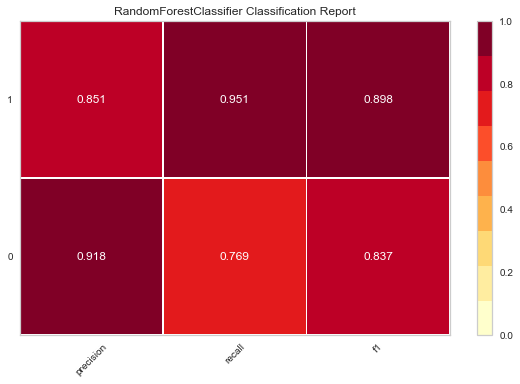

In [99]:
from yellowbrick.classifier import ClassificationReport
rfcr = ClassificationReport(classifier)
rfcr.fit(X_train, y_train)
rfcr.score(X_valid, y_valid)
rfcr.show()

| Algorithms | Train Accuracy | ValidationTest Accuracy | Precision | Recall | F-Measure | AUC Score |
| --- | --- | --- | --- | --- | --- | --- |
| KNN (Without SMOTE) | 85.0% | 82.0%  | 0.8039 | 0.7321 | 0.7663 | 0.88 |
| --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression (Without SMOTE) | 83.6% | 79.9%  | 0.7641 | 0.7232 | 0.7431 | 0.89 |
| --- | --- | --- | --- | --- | --- | --- |
| Support Vector Machine (Without SMOTE) | 90.9% | 86.7%  | 0.9281 | 0.8611 | 0.8933 | 0.91 |
| --- | --- | --- | --- | --- | --- | --- |
| Random Forest (With SMOTE) | 90.6% | 88.8%  | 0.9183 | 0.7692 | 0.8372 | 0.95 |

From the above table we can infer that the Random Forest with smote works well at the time of calculation. But for the algorithms without using smote Support Vector Machine works well for the data at the time of calculation. 

The calculated values might differ as seed value was not passed for the non smote analysis data.